In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
df = pd.read_csv('./data/공공자전거 대여이력 정보_2021.06.csv', engine = 'python')
df

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-30385,2021-05-31 23:07:00,3571,화양 APT(횡단보도 옆),0,2021-06-01 00:00:00,3538,서울숲 IT캐슬,0,53,2502.80
1,SPB-46321,2021-05-31 23:37:19,1911,구로디지털단지역 앞,0,2021-06-01 00:00:02,1843,독산고등학교,0,22,1630.00
2,SPB-48119,2021-05-31 23:48:40,3860,건국대학교 정문 앞,0,2021-06-01 00:00:03,3586,군자역 비채온 오피스텔,0,11,1420.00
3,SPB-55360,2021-05-31 23:47:52,2222,사당역 12번출구 뒤,0,2021-06-01 00:00:05,2228,뒷벌공원 옆,0,12,1350.00
4,SPB-54699,2021-05-31 23:51:14,1955,디지털입구 교차로,0,2021-06-01 00:00:08,1856,모두의학교,0,8,930.00
...,...,...,...,...,...,...,...,...,...,...,...
3445866,SPB-36886,2021-06-30 22:44:14,152,마포구민체육센터 앞,0,2021-07-01 04:48:33,126,서강대 후문 옆,0,364,10153.36
3445867,SPB-30409,2021-06-30 22:45:19,152,마포구민체육센터 앞,0,2021-07-01 04:52:25,437,대흥역 1번출구,0,367,10100.71
3445868,SPB-46230,2021-06-30 22:43:43,152,마포구민체육센터 앞,0,2021-07-01 04:52:27,437,대흥역 1번출구,0,368,430.00
3445869,SPB-41691,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,0,2021-07-01 04:55:29,2526,반포경남쇼핑 앞,0,404,0.00


In [3]:
df.isnull().sum()

자전거번호      0
대여일시       0
대여대여소번호    0
대여대여소명     0
대여거치대      0
반납일시       0
반납대여소번호    0
반납대여소명     0
반납거치대      0
이용시간       0
이용거리       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445871 entries, 0 to 3445870
Data columns (total 11 columns):
 #   Column   Dtype  
---  ------   -----  
 0   자전거번호    object 
 1   대여일시     object 
 2   대여대여소번호  int64  
 3   대여대여소명   object 
 4   대여거치대    int64  
 5   반납일시     object 
 6   반납대여소번호  int64  
 7   반납대여소명   object 
 8   반납거치대    int64  
 9   이용시간     int64  
 10  이용거리     float64
dtypes: float64(1), int64(5), object(5)
memory usage: 289.2+ MB


In [5]:
df.describe()

,대여대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리
count,3.445871e+06,3.445871e+06,3.445871e+06,3.445871e+06,3.445871e+06,3.445871e+06
mean,1.689628e+03,2.556263e+00,1.687082e+03,2.552268e+00,2.588709e+01,3.060081e+03
std,1.246268e+03,1.569001e+01,1.240972e+03,1.567813e+01,2.828476e+01,3.728572e+03
min,3.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,6.740000e+02,0.000000e+00,6.800000e+02,0.000000e+00,8.000000e+00,8.878150e+02
50%,1.362000e+03,0.000000e+00,1.360000e+03,0.000000e+00,1.500000e+01,1.749740e+03
75%,2.408000e+03,0.000000e+00,2.389000e+03,0.000000e+00,3.500000e+01,3.677280e+03
max,9.999900e+04,9.900000e+01,9.999900e+04,9.900000e+01,1.272000e+03,1.993206e+05


- 대여거치대와 반납거치대는 LCD형 자전거의 경우 정해진 거치대에 반납을 해야돼서 거치대순번이 표기된 것.
- 하지만 최근에는 QR형 자전거가 많아졌기 때문에 대부분 0으로 표기됨
- 따라서 필요없는 칼럼이므로 삭제 필요

- 자전거번호, 대여대여소번호, 반납대여소번호, 이용시간, 이용거리 칼럼도 내가 할 분석에는 필요없는 칼럼이므로 삭제
- cf) 이용시간과 이용거리가 0으로 잘못 측정되는 경우도 있다고 함

In [6]:
df = df.drop(['자전거번호', '대여대여소번호', '대여거치대', '반납대여소번호', '반납거치대', '이용시간', '이용거리'], axis = 1)
df

,대여일시,대여대여소명,반납일시,반납대여소명
0,2021-05-31 23:07:00,화양 APT(횡단보도 옆),2021-06-01 00:00:00,서울숲 IT캐슬
1,2021-05-31 23:37:19,구로디지털단지역 앞,2021-06-01 00:00:02,독산고등학교
2,2021-05-31 23:48:40,건국대학교 정문 앞,2021-06-01 00:00:03,군자역 비채온 오피스텔
3,2021-05-31 23:47:52,사당역 12번출구 뒤,2021-06-01 00:00:05,뒷벌공원 옆
4,2021-05-31 23:51:14,디지털입구 교차로,2021-06-01 00:00:08,모두의학교
...,...,...,...,...
3445866,2021-06-30 22:44:14,마포구민체육센터 앞,2021-07-01 04:48:33,서강대 후문 옆
3445867,2021-06-30 22:45:19,마포구민체육센터 앞,2021-07-01 04:52:25,대흥역 1번출구
3445868,2021-06-30 22:43:43,마포구민체육센터 앞,2021-07-01 04:52:27,대흥역 1번출구
3445869,2021-06-30 22:11:14,반포본동 주민센터 앞,2021-07-01 04:55:29,반포경남쇼핑 앞


- 대여일시, 반납일시 타입 날짜 타입으로 변경

In [7]:
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445871 entries, 0 to 3445870
Data columns (total 4 columns):
 #   Column  Dtype         
---  ------  -----         
 0   대여일시    datetime64[ns]
 1   대여대여소명  object        
 2   반납일시    datetime64[ns]
 3   반납대여소명  object        
dtypes: datetime64[ns](2), object(2)
memory usage: 105.2+ MB


In [9]:
df['대여월'] = df['대여일시'].dt.month
df['대여일'] = df['대여일시'].dt.day
df['대여요일'] = df['대여일시'].dt.dayofweek
df['대여시간'] = df['대여일시'].dt.hour
df['대여시간_분'] = df['대여일시'].dt.minute

df['반납월'] = df['반납일시'].dt.month
df['반납일'] = df['반납일시'].dt.day
df['반납요일'] = df['반납일시'].dt.dayofweek
df['반납시간'] = df['반납일시'].dt.hour
df['반납시간_분'] = df['반납일시'].dt.minute

In [10]:
df = df.sort_values('대여일시', ignore_index = True)
df

,대여일시,대여대여소명,반납일시,반납대여소명,대여월,대여일,대여요일,대여시간,대여시간_분,반납월,반납일,반납요일,반납시간,반납시간_분
0,2021-05-31 18:39:50,신목동역 2번 출구,2021-06-01 00:10:23,목동아파트2단지 222동 앞,5,31,0,18,39,6,1,1,0,10
1,2021-05-31 19:03:06,잠실새내역 1번출구,2021-06-01 00:27:39,잠실본동주민센터뒤 잠실근린공원,5,31,0,19,3,6,1,1,0,27
2,2021-05-31 19:16:35,조원동서울본병원,2021-06-01 00:15:25,봉림교 교통섬,5,31,0,19,16,6,1,1,0,15
3,2021-05-31 19:17:35,혜화역 3번출구 뒤,2021-06-01 00:33:45,LG베스트샵 종암점,5,31,0,19,17,6,1,1,0,33
4,2021-05-31 19:21:39,뚝섬 유원지역,2021-06-01 00:03:39,뚝섬유원지역 1번출구 앞,5,31,0,19,21,6,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445866,2021-06-30 23:56:16,노들역 1번출구,2021-07-01 00:03:17,사육신공원앞,6,30,2,23,56,7,1,3,0,3
3445867,2021-06-30 23:56:22,독립문역 사거리,2021-07-01 00:04:52,독립문역 3-1번출구,6,30,2,23,56,7,1,3,0,4
3445868,2021-06-30 23:56:22,한강트럼프월드3차 앞,2021-07-01 00:06:14,한강트럼프월드3차 앞,6,30,2,23,56,7,1,3,0,6
3445869,2021-06-30 23:58:26,대림아파트 사거리,2021-07-01 00:06:51,신길삼거리(우리은행),6,30,2,23,58,7,1,3,0,6


- 대여일시 기준으로 6월인 것부터 분석할 것이므로 대여월이 5인 것은 삭제

In [11]:
df = df[df['대여월'] != 5]
df = df[df['반납월'] != 7]
df

,대여일시,대여대여소명,반납일시,반납대여소명,대여월,대여일,대여요일,대여시간,대여시간_분,반납월,반납일,반납요일,반납시간,반납시간_분
1342,2021-06-01 00:00:01,LG베스트샵 종암점,2021-06-01 00:15:20,용문2교 옆,6,1,1,0,0,6,1,1,0,15
1343,2021-06-01 00:00:01,영등포구청역 1번출구,2021-06-01 00:11:17,유원목동아파트 앞,6,1,1,0,0,6,1,1,0,11
1344,2021-06-01 00:00:02,서남병원 후문,2021-06-01 00:06:00,잣절보도육교 아래,6,1,1,0,0,6,1,1,0,6
1345,2021-06-01 00:00:06,안암2교 옆,2021-06-01 00:04:51,보문역6번출구 앞,6,1,1,0,0,6,1,1,0,4
1346,2021-06-01 00:00:06,한성대입구역2번출구,2021-06-01 00:23:20,상왕십리역 4번 출구 앞,6,1,1,0,0,6,1,1,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445569,2021-06-30 22:49:40,양평1 보행육교 앞,2021-06-30 22:53:15,양평동6차현대아파트 앞,6,30,2,22,49,6,30,2,22,53
3445602,2021-06-30 22:50:11,강변역 4번출구 뒤,2021-06-30 22:53:13,구의삼성쉐르빌 앞,6,30,2,22,50,6,30,2,22,53
3445621,2021-06-30 22:50:32,증산3교 앞,2021-06-30 22:52:57,증산3교 앞,6,30,2,22,50,6,30,2,22,52
3445726,2021-06-30 22:52:06,성북3교 위,2021-06-30 23:48:56,성북3교 위,6,30,2,22,52,6,30,2,23,48


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3442056 entries, 1342 to 3445827
Data columns (total 14 columns):
 #   Column  Dtype         
---  ------  -----         
 0   대여일시    datetime64[ns]
 1   대여대여소명  object        
 2   반납일시    datetime64[ns]
 3   반납대여소명  object        
 4   대여월     int64         
 5   대여일     int64         
 6   대여요일    int64         
 7   대여시간    int64         
 8   대여시간_분  int64         
 9   반납월     int64         
 10  반납일     int64         
 11  반납요일    int64         
 12  반납시간    int64         
 13  반납시간_분  int64         
dtypes: datetime64[ns](2), int64(10), object(2)
memory usage: 393.9+ MB


In [13]:
df['대여대여소명'] = df['대여대여소명'].astype('category')
df['반납대여소명'] = df['반납대여소명'].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3442056 entries, 1342 to 3445827
Data columns (total 14 columns):
 #   Column  Dtype         
---  ------  -----         
 0   대여일시    datetime64[ns]
 1   대여대여소명  category      
 2   반납일시    datetime64[ns]
 3   반납대여소명  category      
 4   대여월     int64         
 5   대여일     int64         
 6   대여요일    int64         
 7   대여시간    int64         
 8   대여시간_분  int64         
 9   반납월     int64         
 10  반납일     int64         
 11  반납요일    int64         
 12  반납시간    int64         
 13  반납시간_분  int64         
dtypes: category(2), datetime64[ns](2), int64(10)
memory usage: 354.7 MB


- 이전 분석(따릉이_연습4)에서 2021년 6월 데이터 중 대여건수가 가장 많았던 station 상위 10은 
    - 뚝섬유원지역 1번출구 앞	15061 광진구
    - 여의나루역 1번출구 앞	14494 영등포구
    - 봉림교 교통섬	11174 관악구
    - 마포구민체육센터 앞	10998 마포구
    - 마곡나루역 2번 출구	10745 강서구
    - 롯데월드타워(잠실역2번출구 쪽)	9574 송파구
    - 신대방역 2번 출구	8125 관악구
    - 발산역 1번, 9번 인근 대여소	7828 강서구
    - 마곡역교차로	7648 강서구
    - 당산육갑문	7601 영등포구
   
- 일단 이 중 뚝섬유원지역 1번출구 앞	15061 광진구 / 여의나루역 1번출구 앞	14494 영등포구 / 마곡나루역 2번 출구	10745 강서구 / 롯데월드타워(잠실역2번출구 쪽)	9574 송파구 분석 해보기
- 분석 데이터는 21년 6월, 20년 6월, 19년 6월, 18년 6월로 순차적으로 해보기

### 평균서비스율(10분당 자전거 대여수의 평균) = $\mu$
- $\mu$ = 10이면 10분동안 평균 10대의 자전거 대여

In [43]:
df_rental = df[['대여일시', '대여대여소명', '대여월', '대여일', '대여요일', '대여시간', '대여시간_분']]
df_rental.reset_index(drop = True, inplace = True)
df_rental

,대여일시,대여대여소명,대여월,대여일,대여요일,대여시간,대여시간_분
0,2021-06-01 00:00:01,LG베스트샵 종암점,6,1,1,0,0
1,2021-06-01 00:00:01,영등포구청역 1번출구,6,1,1,0,0
2,2021-06-01 00:00:02,서남병원 후문,6,1,1,0,0
3,2021-06-01 00:00:06,안암2교 옆,6,1,1,0,0
4,2021-06-01 00:00:06,한성대입구역2번출구,6,1,1,0,0
...,...,...,...,...,...,...,...
3442051,2021-06-30 22:49:40,양평1 보행육교 앞,6,30,2,22,49
3442052,2021-06-30 22:50:11,강변역 4번출구 뒤,6,30,2,22,50
3442053,2021-06-30 22:50:32,증산3교 앞,6,30,2,22,50
3442054,2021-06-30 22:52:06,성북3교 위,6,30,2,22,52


In [44]:
df_rental = df_rental[df_rental['대여대여소명'] == '롯데월드타워(잠실역2번출구 쪽)']
df_rental.reset_index(drop = True, inplace = True)
df_rental

,대여일시,대여대여소명,대여월,대여일,대여요일,대여시간,대여시간_분
0,2021-06-01 00:33:11,롯데월드타워(잠실역2번출구 쪽),6,1,1,0,33
1,2021-06-01 00:44:52,롯데월드타워(잠실역2번출구 쪽),6,1,1,0,44
2,2021-06-01 00:50:57,롯데월드타워(잠실역2번출구 쪽),6,1,1,0,50
3,2021-06-01 02:59:46,롯데월드타워(잠실역2번출구 쪽),6,1,1,2,59
4,2021-06-01 04:30:58,롯데월드타워(잠실역2번출구 쪽),6,1,1,4,30
...,...,...,...,...,...,...,...
9512,2021-06-30 21:45:06,롯데월드타워(잠실역2번출구 쪽),6,30,2,21,45
9513,2021-06-30 22:02:31,롯데월드타워(잠실역2번출구 쪽),6,30,2,22,2
9514,2021-06-30 22:08:56,롯데월드타워(잠실역2번출구 쪽),6,30,2,22,8
9515,2021-06-30 22:11:04,롯데월드타워(잠실역2번출구 쪽),6,30,2,22,11


#### 일단 날짜 상관없이 시간만 가지고 0시, 1시, 2시,..., 23시 즉, 시간별 count해보기

- 이것도 24번 해야 하네.............................

In [46]:
a = [0, 10, 20, 30, 40, 50]
b = [0, 0, 0, 0, 0, 0]

df_group = pd.DataFrame(a)
df_group.columns = ['대여시간_분_그룹']
df_group['count'] = b
df_group

,대여시간_분_그룹,count
0,0,0
1,10,0
2,20,0
3,30,0
4,40,0
5,50,0


#### 0시

In [45]:
df_rental_hour = df_rental[df_rental['대여시간'] == 0]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,13
1,10,2
2,20,7
3,30,4
4,40,4
5,50,8


In [48]:
# 위 결과에서 0, 10, 20, 30, 40, 50 다 나오면 이걸 할 필요가 없네...

#df_group = pd.merge(df_group, df_rental_hour_group, how = 'left', left_on = '대여시간_분_그룹', right_on = '대여시간_분_그룹')
#df_group['count'] = df_group['count_x'] + df_group['count_y']
#df_group = df_group.drop(['count_x', 'count_y'], axis = 1)
#df_group = df_group.fillna(0)
#df_group

- 0시에는
- 0분~9분 사이에 13번 대여
- 10분~19분 사이에 2번 대여
- 20분~29분 사이에 7번 대여
- 30분~39분 사이에 4번 대여
- 40분~49분 사이에 4번 대여
- 50분~59분 사이에 8번 대여함
- 따라서 0시에 10분당 평균 대여율은 13+2+7+4+4+8/6

0시 평균서비스율(10분당 자전거 대여수의 평균) = $\mu$

In [53]:
# 0시 10분당 평균 대여율 = 평균서비스율

mu = df_rental_hour_group['count'].sum() / 6
mu

6.333333333333333

#### 1시

In [54]:
df_rental_hour = df_rental[df_rental['대여시간'] == 1]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,4
1,10,8
2,20,2
3,30,1
4,40,6
5,50,7


In [55]:
# 1시 10분당 평균 대여율 = 평균서비스율

mu = df_rental_hour_group['count'].sum() / 6
mu

4.666666666666667

#### 2시

In [56]:
df_rental_hour = df_rental[df_rental['대여시간'] == 2]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,7
1,10,1
2,20,4
3,30,2
4,40,2
5,50,2


In [57]:
# 2시 10분당 평균 대여율 = 평균서비스율

mu = df_rental_hour_group['count'].sum() / 6
mu

3.0

#### 3시

In [58]:
df_rental_hour = df_rental[df_rental['대여시간'] == 3]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,4
1,10,1
2,20,1
3,30,1
4,40,1
5,50,3


In [59]:
# 10분당 평균 대여율 = 평균서비스율

mu = df_rental_hour_group['count'].sum() / 6
mu

1.8333333333333333

#### 4시

In [60]:
df_rental_hour = df_rental[df_rental['대여시간'] == 4]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,3
1,10,7
2,20,3
3,30,2
4,40,1
5,50,1


In [61]:
# 10분당 평균 대여율 = 평균서비스율

mu = df_rental_hour_group['count'].sum() / 6
mu

2.8333333333333335

#### 5시

In [62]:
df_rental_hour = df_rental[df_rental['대여시간'] == 5]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,2
1,20,4


In [63]:
# 10분당 평균 대여율 = 평균서비스율

mu = df_rental_hour_group['count'].sum() / 6
mu

1.0

#### 6시

In [64]:
df_rental_hour = df_rental[df_rental['대여시간'] == 6]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,3
1,10,2
2,20,4
3,30,10
4,40,10
5,50,12


In [65]:
# 10분당 평균 대여율 = 평균서비스율

mu = df_rental_hour_group['count'].sum() / 6
mu

6.833333333333333

#### 7시

In [66]:
df_rental_hour = df_rental[df_rental['대여시간'] == 7]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,14
1,10,17
2,20,35
3,30,38
4,40,32
5,50,35


In [67]:
# 10분당 평균 대여율 = 평균서비스율

mu = df_rental_hour_group['count'].sum() / 6
mu

28.5

#### 8시

In [68]:
df_rental_hour = df_rental[df_rental['대여시간'] == 8]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,44
1,10,55
2,20,58
3,30,157
4,40,110
5,50,64


In [69]:
# 10분당 평균 대여율 = 평균서비스율

mu = df_rental_hour_group['count'].sum() / 6
mu

81.33333333333333

#### 9시

In [70]:
df_rental_hour = df_rental[df_rental['대여시간'] == 9]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,37
1,10,55
2,20,49
3,30,39
4,40,78
5,50,52


In [71]:
# 10분당 평균 대여율 = 평균서비스율

mu = df_rental_hour_group['count'].sum() / 6
mu

51.666666666666664

#### 10시

In [72]:
df_rental_hour = df_rental[df_rental['대여시간'] == 10]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,37
1,10,46
2,20,46
3,30,31
4,40,37
5,50,43


In [73]:
# 10분당 평균 대여율 = 평균서비스율

mu = df_rental_hour_group['count'].sum() / 6
mu

40.0

#### 11시

In [74]:
df_rental_hour = df_rental[df_rental['대여시간'] == 11]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,38
1,10,47
2,20,36
3,30,43
4,40,58
5,50,58


In [75]:
# 10분당 평균 대여율 = 평균서비스율

mu = df_rental_hour_group['count'].sum() / 6
mu

46.666666666666664

#### 12시

In [76]:
df_rental_hour = df_rental[df_rental['대여시간'] == 12]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,61
1,10,52
2,20,58
3,30,69
4,40,70
5,50,78


In [77]:
# 10분당 평균 대여율 = 평균서비스율

mu = df_rental_hour_group['count'].sum() / 6
mu

64.66666666666667

#### 13시

In [78]:
df_rental_hour = df_rental[df_rental['대여시간'] == 13]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,78
1,10,76
2,20,52
3,30,73
4,40,77
5,50,57


In [79]:
# 10분당 평균 대여율 = 평균서비스율

mu = df_rental_hour_group['count'].sum() / 6
mu

68.83333333333333

#### 14시

In [80]:
df_rental_hour = df_rental[df_rental['대여시간'] == 14]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,89
1,10,94
2,20,82
3,30,89
4,40,93
5,50,71


In [81]:
# 10분당 평균 대여율 = 평균서비스율

mu = df_rental_hour_group['count'].sum() / 6
mu

86.33333333333333

#### 15시

In [82]:
df_rental_hour = df_rental[df_rental['대여시간'] == 15]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,89
1,10,97
2,20,91
3,30,102
4,40,111
5,50,93


In [83]:
# 10분당 평균 대여율 = 평균서비스율

mu = df_rental_hour_group['count'].sum() / 6
mu

97.16666666666667

#### 16시

In [84]:
df_rental_hour = df_rental[df_rental['대여시간'] == 16]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,84
1,10,109
2,20,126
3,30,116
4,40,121
5,50,133


In [85]:
# 10분당 평균 대여율 = 평균서비스율

mu = df_rental_hour_group['count'].sum() / 6
mu

114.83333333333333

#### 17시

In [86]:
df_rental_hour = df_rental[df_rental['대여시간'] == 17]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,142
1,10,160
2,20,187
3,30,201
4,40,179
5,50,195


In [87]:
# 10분당 평균 대여율 = 평균서비스율

mu = df_rental_hour_group['count'].sum() / 6
mu

177.33333333333334

#### 18시

In [88]:
df_rental_hour = df_rental[df_rental['대여시간'] == 18]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,282
1,10,319
2,20,353
3,30,302
4,40,276
5,50,283


In [89]:
# 10분당 평균 대여율 = 평균서비스율

mu = df_rental_hour_group['count'].sum() / 6
mu

302.5

#### 19시

In [90]:
df_rental_hour = df_rental[df_rental['대여시간'] == 19]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,187
1,10,168
2,20,161
3,30,123
4,40,122
5,50,107


In [91]:
# 10분당 평균 대여율 = 평균서비스율

mu = df_rental_hour_group['count'].sum() / 6
mu

144.66666666666666

#### 20시

In [92]:
df_rental_hour = df_rental[df_rental['대여시간'] == 20]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,135
1,10,135
2,20,117
3,30,97
4,40,96
5,50,86


In [93]:
# 10분당 평균 대여율 = 평균서비스율

mu = df_rental_hour_group['count'].sum() / 6
mu

111.0

#### 21시

In [94]:
df_rental_hour = df_rental[df_rental['대여시간'] == 21]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,78
1,10,76
2,20,88
3,30,84
4,40,68
5,50,58


In [95]:
# 10분당 평균 대여율 = 평균서비스율

mu = df_rental_hour_group['count'].sum() / 6
mu

75.33333333333333

#### 22시

In [96]:
df_rental_hour = df_rental[df_rental['대여시간'] == 22]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,53
1,10,49
2,20,50
3,30,63
4,40,35
5,50,34


In [97]:
# 10분당 평균 대여율 = 평균서비스율

mu = df_rental_hour_group['count'].sum() / 6
mu

47.333333333333336

#### 23시

In [98]:
df_rental_hour = df_rental[df_rental['대여시간'] == 23]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,30
1,10,21
2,20,25
3,30,14
4,40,12
5,50,27


In [99]:
# 10분당 평균 대여율 = 평균서비스율

mu = df_rental_hour_group['count'].sum() / 6
mu

21.5

- 2021년 6월 한달동안의 롯데월드타워(잠실역2번출구 쪽)대여소의 평균서비스율 뮤(10분당 평균 대여수)는

시간 | mu
- | -
0시 | 6.333333333333333
1시 | 4.666666666666667
2시 | 3.0
3시 | 1.8333333333333333
4시 | 2.8333333333333335
5시 | 1.0
6시 | 6.833333333333333
7시 | 28.5
8시 | 81.33333333333333
9시 | 51.666666666666664
10시 | 40.0
11시 | 46.666666666666664
12시 | 64.66666666666667
13시 | 68.83333333333333
14시 | 86.33333333333333
15시 | 97.16666666666667
16시 | 114.83333333333333
17시 | 177.33333333333334
18시 | 302.5
19시 | 144.66666666666666
20시 | 111.0
21시 | 75.33333333333333
22시 | 47.333333333333336
23시 | 21.5

#### 여기서부터는 요일도 다르게 해보려고 했는데 시간 없으니 일단 1일만

In [18]:
df_rental_1 = df_rental[df_rental['대여일'] == 1]
df_rental_1.reset_index(drop = True, inplace = True) 
df_rental_1

,대여일시,대여대여소명,대여월,대여일,대여요일,대여시간,대여시간_분
0,2021-06-01 00:33:11,롯데월드타워(잠실역2번출구 쪽),6,1,1,0,33
1,2021-06-01 00:44:52,롯데월드타워(잠실역2번출구 쪽),6,1,1,0,44
2,2021-06-01 00:50:57,롯데월드타워(잠실역2번출구 쪽),6,1,1,0,50
3,2021-06-01 02:59:46,롯데월드타워(잠실역2번출구 쪽),6,1,1,2,59
4,2021-06-01 04:30:58,롯데월드타워(잠실역2번출구 쪽),6,1,1,4,30
...,...,...,...,...,...,...,...
274,2021-06-01 22:32:44,롯데월드타워(잠실역2번출구 쪽),6,1,1,22,32
275,2021-06-01 22:44:34,롯데월드타워(잠실역2번출구 쪽),6,1,1,22,44
276,2021-06-01 22:45:08,롯데월드타워(잠실역2번출구 쪽),6,1,1,22,45
277,2021-06-01 23:40:49,롯데월드타워(잠실역2번출구 쪽),6,1,1,23,40


In [19]:
df_rental_1_8 = df_rental_1[df_rental_1['대여시간'] == 8]
df_rental_1_8.reset_index(drop = True, inplace = True)
df_rental_1_8

,대여일시,대여대여소명,대여월,대여일,대여요일,대여시간,대여시간_분
0,2021-06-01 08:00:10,롯데월드타워(잠실역2번출구 쪽),6,1,1,8,0
1,2021-06-01 08:10:46,롯데월드타워(잠실역2번출구 쪽),6,1,1,8,10
2,2021-06-01 08:35:41,롯데월드타워(잠실역2번출구 쪽),6,1,1,8,35
3,2021-06-01 08:37:44,롯데월드타워(잠실역2번출구 쪽),6,1,1,8,37
4,2021-06-01 08:39:06,롯데월드타워(잠실역2번출구 쪽),6,1,1,8,39
5,2021-06-01 08:42:14,롯데월드타워(잠실역2번출구 쪽),6,1,1,8,42
6,2021-06-01 08:45:49,롯데월드타워(잠실역2번출구 쪽),6,1,1,8,45
7,2021-06-01 08:47:56,롯데월드타워(잠실역2번출구 쪽),6,1,1,8,47
8,2021-06-01 08:49:52,롯데월드타워(잠실역2번출구 쪽),6,1,1,8,49
9,2021-06-01 08:54:48,롯데월드타워(잠실역2번출구 쪽),6,1,1,8,54


- 대여시간_분을 기준으로 0-9, 10-19, 20-29, 30-39, 40-49, 50-59를 묶어서 count

In [20]:
df_rental_1_8['대여시간_분_그룹'] = -1

In [21]:
for i in range(len(df_rental_1_8)):
    if df_rental_1_8['대여시간_분'][i] >= 50:
        df_rental_1_8['대여시간_분_그룹'][i] = 50
    elif df_rental_1_8['대여시간_분'][i] >= 40:
        df_rental_1_8['대여시간_분_그룹'][i] = 40
    elif df_rental_1_8['대여시간_분'][i] >= 30:
        df_rental_1_8['대여시간_분_그룹'][i] = 30
    elif df_rental_1_8['대여시간_분'][i] >= 20:
        df_rental_1_8['대여시간_분_그룹'][i] = 20
    elif df_rental_1_8['대여시간_분'][i] >= 10:
        df_rental_1_8['대여시간_분_그룹'][i] = 10
    else:
        df_rental_1_8['대여시간_분_그룹'][i] = 0

In [22]:
df_rental_1_8

,대여일시,대여대여소명,대여월,대여일,대여요일,대여시간,대여시간_분,대여시간_분_그룹
0,2021-06-01 08:00:10,롯데월드타워(잠실역2번출구 쪽),6,1,1,8,0,0
1,2021-06-01 08:10:46,롯데월드타워(잠실역2번출구 쪽),6,1,1,8,10,10
2,2021-06-01 08:35:41,롯데월드타워(잠실역2번출구 쪽),6,1,1,8,35,30
3,2021-06-01 08:37:44,롯데월드타워(잠실역2번출구 쪽),6,1,1,8,37,30
4,2021-06-01 08:39:06,롯데월드타워(잠실역2번출구 쪽),6,1,1,8,39,30
5,2021-06-01 08:42:14,롯데월드타워(잠실역2번출구 쪽),6,1,1,8,42,40
6,2021-06-01 08:45:49,롯데월드타워(잠실역2번출구 쪽),6,1,1,8,45,40
7,2021-06-01 08:47:56,롯데월드타워(잠실역2번출구 쪽),6,1,1,8,47,40
8,2021-06-01 08:49:52,롯데월드타워(잠실역2번출구 쪽),6,1,1,8,49,40
9,2021-06-01 08:54:48,롯데월드타워(잠실역2번출구 쪽),6,1,1,8,54,50


In [23]:
df_rental_1_8_group = df_rental_1_8.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_1_8_group

,대여시간_분_그룹,대여시간_분
0,0,1
1,10,1
2,30,3
3,40,4
4,50,4


In [24]:
df_rental_1_8_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)

In [25]:
df_rental_1_8_group

,대여시간_분_그룹,count
0,0,1
1,10,1
2,30,3
3,40,4
4,50,4


In [26]:
a = [0, 10, 20, 30, 40, 50]
b = [0, 0, 0, 0, 0, 0]

df_group = pd.DataFrame(a)
df_group.columns = ['대여시간_분_그룹']
df_group['count'] = b
df_group

,대여시간_분_그룹,count
0,0,0
1,10,0
2,20,0
3,30,0
4,40,0
5,50,0


In [27]:
df_group = pd.merge(df_group, df_rental_1_8_group, how = 'left', left_on = '대여시간_분_그룹', right_on = '대여시간_분_그룹')
df_group

,대여시간_분_그룹,count_x,count_y
0,0,0,1.0
1,10,0,1.0
2,20,0,NaN
3,30,0,3.0
4,40,0,4.0
5,50,0,4.0


In [28]:
df_group['count'] = df_group['count_x'] + df_group['count_y']
df_group = df_group.drop(['count_x', 'count_y'], axis = 1)
df_group = df_group.fillna(0)
df_group

,대여시간_분_그룹,count
0,0,1.0
1,10,1.0
2,20,0.0
3,30,3.0
4,40,4.0
5,50,4.0


### 평균도착률(10분당 자전거 반납수의 평균) = $\lambda$
- $\lambda$ = 10이면 10분동안 평균 10대의 자전거를 반납

In [29]:
df_return = df[['반납일시', '반납대여소명', '반납월', '반납일', '반납요일', '반납시간', '반납시간_분']]
df_return

,반납일시,반납대여소명,반납월,반납일,반납요일,반납시간,반납시간_분
1342,2021-06-01 00:15:20,용문2교 옆,6,1,1,0,15
1343,2021-06-01 00:11:17,유원목동아파트 앞,6,1,1,0,11
1344,2021-06-01 00:06:00,잣절보도육교 아래,6,1,1,0,6
1345,2021-06-01 00:04:51,보문역6번출구 앞,6,1,1,0,4
1346,2021-06-01 00:23:20,상왕십리역 4번 출구 앞,6,1,1,0,23
...,...,...,...,...,...,...,...
3445569,2021-06-30 22:53:15,양평동6차현대아파트 앞,6,30,2,22,53
3445602,2021-06-30 22:53:13,구의삼성쉐르빌 앞,6,30,2,22,53
3445621,2021-06-30 22:52:57,증산3교 앞,6,30,2,22,52
3445726,2021-06-30 23:48:56,성북3교 위,6,30,2,23,48


In [30]:
df_return = df_return[df_return['반납대여소명'] == '롯데월드타워(잠실역2번출구 쪽)']
df_return

,반납일시,반납대여소명,반납월,반납일,반납요일,반납시간,반납시간_분
1772,2021-06-01 00:13:16,롯데월드타워(잠실역2번출구 쪽),6,1,1,0,13
2673,2021-06-01 00:36:29,롯데월드타워(잠실역2번출구 쪽),6,1,1,0,36
4196,2021-06-01 01:38:07,롯데월드타워(잠실역2번출구 쪽),6,1,1,1,38
6658,2021-06-01 04:29:38,롯데월드타워(잠실역2번출구 쪽),6,1,1,4,29
6691,2021-06-01 04:39:19,롯데월드타워(잠실역2번출구 쪽),6,1,1,4,39
...,...,...,...,...,...,...,...
3436738,2021-06-30 22:05:26,롯데월드타워(잠실역2번출구 쪽),6,30,2,22,5
3437969,2021-06-30 22:11:58,롯데월드타워(잠실역2번출구 쪽),6,30,2,22,11
3438474,2021-06-30 22:10:35,롯데월드타워(잠실역2번출구 쪽),6,30,2,22,10
3444854,2021-06-30 22:49:46,롯데월드타워(잠실역2번출구 쪽),6,30,2,22,49


- 여기서도 일단 시간과 분만 가지고 분석

#### 0시

In [100]:
df_return_hour = df_return[df_return['반납시간'] == 0]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,5
1,10,3
2,20,8
3,30,8
4,40,5
5,50,4


In [102]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda = df_return_hour_group['count'].sum() / 6
lda

5.5

#### 1시

In [103]:
df_return_hour = df_return[df_return['반납시간'] == 1]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,10,5
1,20,7
2,30,10
3,40,12
4,50,3


In [104]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda = df_return_hour_group['count'].sum() / 6
lda

6.166666666666667

#### 2시

In [105]:
df_return_hour = df_return[df_return['반납시간'] == 2]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,3
1,20,1
2,40,1
3,50,2


In [106]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda = df_return_hour_group['count'].sum() / 6
lda

1.1666666666666667

#### 3시

In [107]:
df_return_hour = df_return[df_return['반납시간'] == 3]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,5
1,10,2
2,20,1
3,30,1
4,40,1
5,50,5


In [108]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda = df_return_hour_group['count'].sum() / 6
lda

2.5

#### 4시

In [109]:
df_return_hour = df_return[df_return['반납시간'] == 4]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,2
1,10,3
2,20,2
3,30,2
4,40,11
5,50,1


In [110]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda = df_return_hour_group['count'].sum() / 6
lda

3.5

#### 5시

In [111]:
df_return_hour = df_return[df_return['반납시간'] == 5]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,3
1,20,1
2,30,5
3,40,3
4,50,2


In [112]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda = df_return_hour_group['count'].sum() / 6
lda

2.3333333333333335

#### 6시

In [113]:
df_return_hour = df_return[df_return['반납시간'] == 6]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,3
1,10,14
2,20,3
3,30,18
4,40,77
5,50,39


In [114]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda = df_return_hour_group['count'].sum() / 6
lda

25.666666666666668

#### 7시

In [115]:
df_return_hour = df_return[df_return['반납시간'] == 7]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,47
1,10,38
2,20,47
3,30,62
4,40,129
5,50,81


In [116]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda = df_return_hour_group['count'].sum() / 6
lda

67.33333333333333

#### 8시

In [117]:
df_return_hour = df_return[df_return['반납시간'] == 8]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,152
1,10,134
2,20,137
3,30,129
4,40,164
5,50,111


In [118]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda = df_return_hour_group['count'].sum() / 6
lda

137.83333333333334

#### 9시

In [119]:
df_return_hour = df_return[df_return['반납시간'] == 9]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,88
1,10,147
2,20,62
3,30,52
4,40,74
5,50,98


In [120]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda = df_return_hour_group['count'].sum() / 6
lda

86.83333333333333

#### 10시

In [121]:
df_return_hour = df_return[df_return['반납시간'] == 10]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,63
1,10,71
2,20,74
3,30,70
4,40,58
5,50,72


In [122]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda = df_return_hour_group['count'].sum() / 6
lda

68.0

#### 11시

In [123]:
df_return_hour = df_return[df_return['반납시간'] == 11]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,59
1,10,63
2,20,60
3,30,73
4,40,79
5,50,66


In [124]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda = df_return_hour_group['count'].sum() / 6
lda

66.66666666666667

#### 12시

In [125]:
df_return_hour = df_return[df_return['반납시간'] == 12]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,85
1,10,75
2,20,56
3,30,90
4,40,76
5,50,94


In [126]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda = df_return_hour_group['count'].sum() / 6
lda

79.33333333333333

#### 13시

In [127]:
df_return_hour = df_return[df_return['반납시간'] == 13]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,93
1,10,75
2,20,92
3,30,80
4,40,79
5,50,80


In [128]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda = df_return_hour_group['count'].sum() / 6
lda

83.16666666666667

#### 14시

In [129]:
df_return_hour = df_return[df_return['반납시간'] == 14]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,85
1,10,91
2,20,80
3,30,70
4,40,99
5,50,81


In [130]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda = df_return_hour_group['count'].sum() / 6
lda

84.33333333333333

#### 15시

In [131]:
df_return_hour = df_return[df_return['반납시간'] == 15]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,76
1,10,93
2,20,92
3,30,104
4,40,95
5,50,100


In [132]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda = df_return_hour_group['count'].sum() / 6
lda

93.33333333333333

#### 16시

In [133]:
df_return_hour = df_return[df_return['반납시간'] == 16]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,93
1,10,113
2,20,122
3,30,117
4,40,115
5,50,110


In [134]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda = df_return_hour_group['count'].sum() / 6
lda

111.66666666666667

#### 17시

In [135]:
df_return_hour = df_return[df_return['반납시간'] == 17]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,110
1,10,98
2,20,119
3,30,150
4,40,144
5,50,159


In [136]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda = df_return_hour_group['count'].sum() / 6
lda

130.0

#### 18시

In [137]:
df_return_hour = df_return[df_return['반납시간'] == 18]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,144
1,10,203
2,20,221
3,30,169
4,40,180
5,50,148


In [138]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda = df_return_hour_group['count'].sum() / 6
lda

177.5

#### 19시

In [139]:
df_return_hour = df_return[df_return['반납시간'] == 19]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,141
1,10,121
2,20,137
3,30,107
4,40,126
5,50,109


In [140]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda = df_return_hour_group['count'].sum() / 6
lda

123.5

#### 20시

In [141]:
df_return_hour = df_return[df_return['반납시간'] == 20]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,101
1,10,118
2,20,101
3,30,72
4,40,81
5,50,86


In [142]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda = df_return_hour_group['count'].sum() / 6
lda

93.16666666666667

#### 21시

In [143]:
df_return_hour = df_return[df_return['반납시간'] == 21]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,62
1,10,84
2,20,81
3,30,80
4,40,57
5,50,49


In [144]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda = df_return_hour_group['count'].sum() / 6
lda

68.83333333333333

#### 22시

In [145]:
df_return_hour = df_return[df_return['반납시간'] == 22]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,50
1,10,54
2,20,57
3,30,53
4,40,35
5,50,32


In [146]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda = df_return_hour_group['count'].sum() / 6
lda

46.833333333333336

#### 23시

In [147]:
df_return_hour = df_return[df_return['반납시간'] == 23]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,33
1,10,24
2,20,23
3,30,13
4,40,15
5,50,20


In [148]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda = df_return_hour_group['count'].sum() / 6
lda

21.333333333333332

- 2021년 6월 한달동안의 롯데월드타워(잠실역2번출구 쪽)대여소의 평균도착률 람다(10분당 평균 반납수)는

시간|lambda
-|-
0시|5.5
1시|6.166666666666667
2시|1.1666666666666667
3시|2.5
4시|3.5
5시|2.3333333333333335
6시|25.666666666666668
7시|67.33333333333333
8시|137.83333333333334
9시|86.83333333333333
10시|68.0
11시|66.66666666666667
12시|79.33333333333333
13시|83.16666666666667
14시|84.33333333333333
15시|93.33333333333333
16시|111.66666666666667
17시|130.0
18시|177.5
19시|123.5
20시|93.16666666666667
21시|68.83333333333333
22시|46.833333333333336
23시|21.333333333333332

- 다시 살펴보면
- 2021년 6월 한달동안의 롯데월드타워(잠실역2번출구 쪽)대여소의 평균서비스율 뮤(10분당 평균 대여수)는

시간 | mu
- | -
0시 | 6.333333333333333
1시 | 4.666666666666667
2시 | 3.0
3시 | 1.8333333333333333
4시 | 2.8333333333333335
5시 | 1.0
6시 | 6.833333333333333
7시 | 28.5
8시 | 81.33333333333333
9시 | 51.666666666666664
10시 | 40.0
11시 | 46.666666666666664
12시 | 64.66666666666667
13시 | 68.83333333333333
14시 | 86.33333333333333
15시 | 97.16666666666667
16시 | 114.83333333333333
17시 | 177.33333333333334
18시 | 302.5
19시 | 144.66666666666666
20시 | 111.0
21시 | 75.33333333333333
22시 | 47.333333333333336
23시 | 21.5

### 가용도(고객이 station에 도착했을 때 자전거가 station에 있을 확률)
$1 - (1 - \frac{\lambda}{\mu})(\frac{\lambda}{\mu})^0$ = $\frac{\lambda}{\mu}$

In [150]:
# 0시
5.5 / 6.333333333333333

0.868421052631579

In [151]:
# 1시
6.166666666666667/4.666666666666667

1.3214285714285714

In [152]:
# 2시
1.1666666666666667/3.0

0.3888888888888889

In [153]:
# 3시
2.5/1.8333333333333333

1.3636363636363638

In [154]:
# 4시
3.5/2.8333333333333335

1.2352941176470587

In [155]:
# 5시
2.3333333333333335/1.0

2.3333333333333335

In [156]:
# 6시
25.666666666666668/6.833333333333333

3.75609756097561

In [157]:
# 7시
67.33333333333333/28.5

2.3625730994152043

In [158]:
# 8시
137.83333333333334/81.33333333333333

1.6946721311475412

In [159]:
#9시
86.83333333333333/51.666666666666664

1.6806451612903226

In [160]:
#10시
68.0/40.0

1.7

In [161]:
#11시
66.66666666666667/46.666666666666664

1.4285714285714288

In [162]:
#12시
79.33333333333333/64.66666666666667

1.22680412371134

In [163]:
#13시
83.16666666666667/68.83333333333333

1.2082324455205813

In [164]:
#14시
84.33333333333333/86.33333333333333

0.9768339768339769

In [165]:
#15시
93.33333333333333/97.16666666666667

0.9605488850771868

In [166]:
#16시
111.66666666666667/114.83333333333333

0.972423802612482

In [167]:
#17시
130.0/177.33333333333334

0.7330827067669172

In [168]:
#18시
177.5/302.5

0.5867768595041323

In [169]:
#19시
123.5/144.66666666666666

0.8536866359447005

In [170]:
#20시
93.16666666666667/111.0

0.8393393393393394

In [171]:
#21시
68.83333333333333/75.33333333333333

0.9137168141592921

In [172]:
#22시
46.833333333333336/47.333333333333336

0.9894366197183099

In [173]:
#23시
21.333333333333332/21.5

0.9922480620155039

- 가용도(고객이 station에 도착했을 때 자전거가 station에 있을 확률)
$1 - (1 - \frac{\lambda}{\mu})(\frac{\lambda}{\mu})^0$ = $\frac{\lambda}{\mu}$

시간|가용도
-|-
0시|0.868421052631579
1시|1.3214285714285714
2시|0.3888888888888889
3시|1.3636363636363638
4시|1.2352941176470587
5시|2.3333333333333335
6시|3.75609756097561
7시|2.3625730994152043
8시|1.6946721311475412
9시|1.6806451612903226
10시|1.7
11시|1.4285714285714288
12시|1.22680412371134
13시|1.2082324455205813
14시|0.9768339768339769
15시|0.9605488850771868
16시|0.972423802612482
17시|0.7330827067669172
18시|0.5867768595041323
19시|0.8536866359447005
20시|0.8393393393393394
21시|0.9137168141592921
22시|0.9894366197183099
23시|0.9922480620155039

In [176]:
time = ['0시', '1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시',
       '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시']
ldb = [5.5, 6.166666666666667, 1.1666666666666667, 2.5, 3.5, 2.3333333333333335, 25.666666666666668,
       67.33333333333333, 137.83333333333334, 86.83333333333333, 68.0, 66.66666666666667, 79.33333333333333,
       83.16666666666667, 84.33333333333333, 93.33333333333333, 111.66666666666667, 130.0, 177.5, 123.5,
       93.16666666666667, 68.83333333333333, 46.833333333333336, 21.333333333333332] 
mu = [6.333333333333333, 4.666666666666667, 3.0, 1.8333333333333333, 2.8333333333333335, 1.0, 6.833333333333333, 28.5,
      81.33333333333333, 51.666666666666664, 40.0, 46.666666666666664, 64.66666666666667, 68.83333333333333, 86.33333333333333,
      97.16666666666667, 114.83333333333333, 177.33333333333334, 302.5, 144.66666666666666, 111.0, 75.33333333333333,
      47.333333333333336, 21.5]
가용도 = [0.868421052631579, 1.3214285714285714, 0.3888888888888889, 1.3636363636363638, 1.2352941176470587,
       2.3333333333333335, 3.75609756097561, 2.3625730994152043, 1.6946721311475412, 1.6806451612903226, 1.7,
       1.4285714285714288, 1.22680412371134, 1.2082324455205813, 0.9768339768339769, 0.9605488850771868, 0.972423802612482,
       0.7330827067669172, 0.5867768595041323, 0.8536866359447005, 0.8393393393393394, 0.9137168141592921,
       0.9894366197183099, 0.9922480620155039]

result = pd.DataFrame(time)
result.columns = ['time']
result['lambda'] = ldb
result['mu'] = mu
result['가용도'] = 가용도
result

,time,lambda,mu,가용도
0,0시,5.500000,6.333333,0.868421
1,1시,6.166667,4.666667,1.321429
2,2시,1.166667,3.000000,0.388889
3,3시,2.500000,1.833333,1.363636
4,4시,3.500000,2.833333,1.235294
5,5시,2.333333,1.000000,2.333333
6,6시,25.666667,6.833333,3.756098
7,7시,67.333333,28.500000,2.362573
8,8시,137.833333,81.333333,1.694672
9,9시,86.833333,51.666667,1.680645


In [190]:
plt.style.use('bmh')

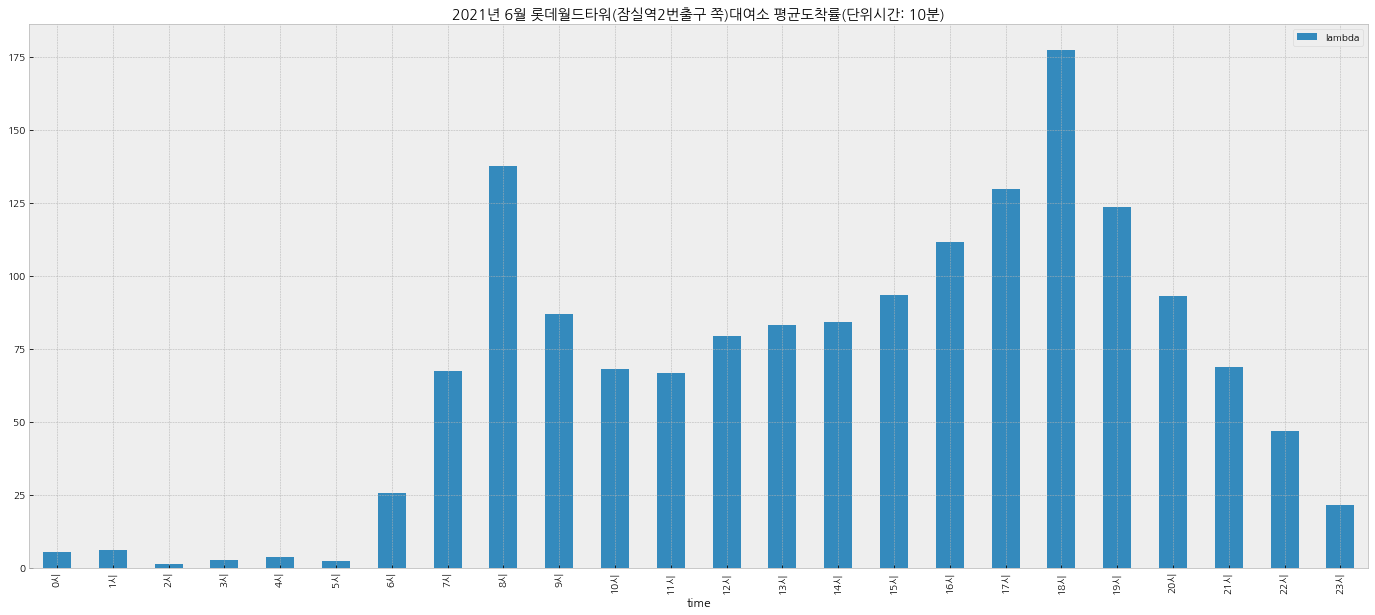

In [191]:
result.plot(kind = 'bar', x = 'time', y = 'lambda', figsize = (24, 10), 
            title = '2021년 6월 롯데월드타워(잠실역2번출구 쪽)대여소 평균도착률(단위시간: 10분)')
plt.show()

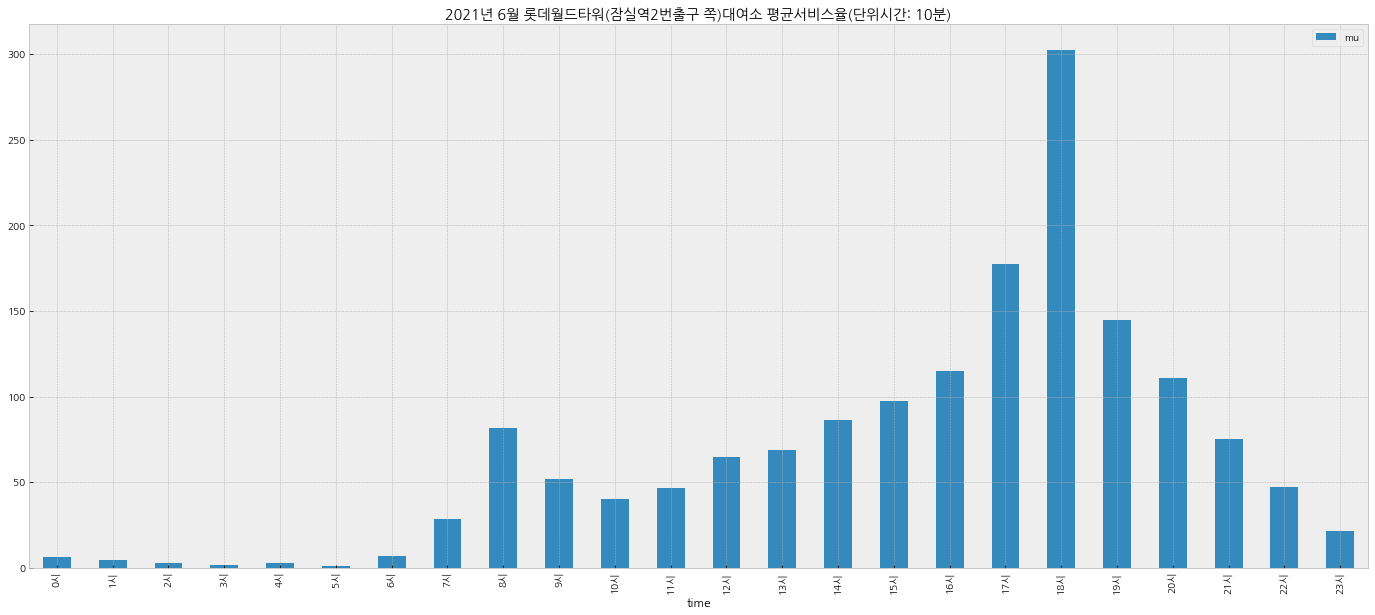

In [192]:
result.plot(kind = 'bar', x = 'time', y = 'mu', figsize = (24, 10), 
            title = '2021년 6월 롯데월드타워(잠실역2번출구 쪽)대여소 평균서비스율(단위시간: 10분)')
plt.show()

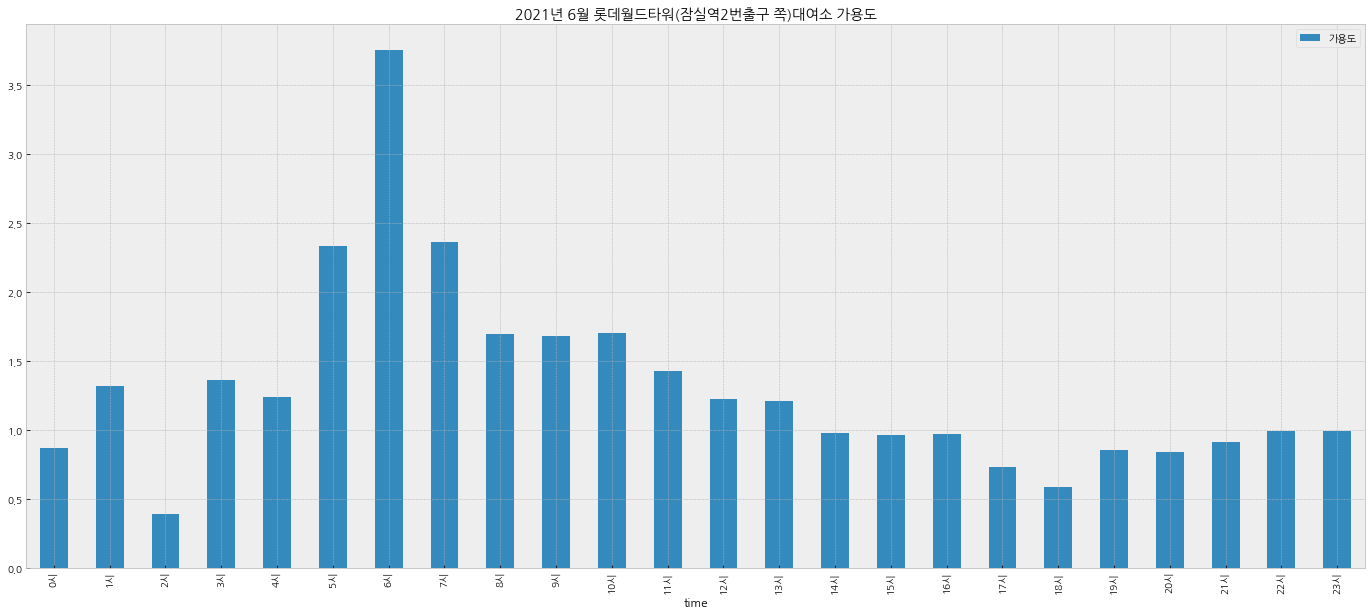

In [193]:
result.plot(kind = 'bar', x = 'time', y = '가용도', figsize = (24, 10), 
            title = '2021년 6월 롯데월드타워(잠실역2번출구 쪽)대여소 가용도')
plt.show()

- 가용도가 1이하인 시간대에는 반납보다 대여가 많아서 자전거 빌리기 어려움
- 0시, 2시, 14시 ~ 23시까지 전부 가용도가 1 이하임
- 0시와 2시에는 이 대여소가 지하철역 근처 대여소이므로 여기서 집까지 가기 위해 자전거를 대여하고 집근처에서 반납했을 것으로 추정
- 오전 6시에 가용도가 확 높아지는 것으로 보아 이때 자전거 재배치하는 것 같음.
- 14시 이후부터는 가용도가 계속 1이하로 내려가 있기 때문에 자전거 이용하기 어려움. 특히, 퇴근이 가까워지는 17시, 18시에 가용도가 떨어지는 것으로 보아 이 전에 자전거 재배치를 한 번 해줘야 함